In [1]:
# O'Reilly Bayes 
# Chapter 4 - Estimating Proportions

# Remember I graduated college in 2004, which means the last time I did stats was 2000 maybe.
# My old employer wouldn't pay for tech refresh, but did pay for languages.

In [2]:
# The Euro problem
# When spun on edge 250 times, a Belgian one-Euro coin came up heads 140 times and tails 110.
# "It looks very suspicious to me," said Barry Blight, a statistics lecturer at the London 
# School of Economics.  "If the coin were unbiased, the chance of getting a result as extreme
# as that would be less than 7%."
# Does the data give evidence that the coin is biased rather than fair?


In [3]:
# Binomial distribution. For any value of k from 0 to n, the term "n choose k" is the binomial
# coefficient. We could evaluate this expression ourselves, but we can also use the SciPy function
# binom.pmf.  For example,if we flip a coin n=2 times and the probability of heads is p =0.5, 
# here's the probability of getting k = 1 heads.

from scipy.stats import binom

n = 2
p = 0.5
k = 1

binom.pmf(k,n,p)

0.5000000000000002

In [4]:
import numpy as np
ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
print(ks)
print(ps)

[0 1 2]
[0.25 0.5  0.25]


In [5]:
from empiricaldist import Pmf

pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [6]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

In [7]:
pmf_k = make_binomial(n=250, p=0.5)

In [8]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

pmf_k = make_binomial(n=250, p=0.5)

pmf_k
    

,probs
0,5.527148e-76
1,1.381787e-73
2,1.720325e-71
3,1.422135e-69
4,8.781685e-68
...,...
246,8.781685e-68
247,1.422135e-69
248,1.720325e-71
249,1.381787e-73


In [9]:
# What will I do with my Joker's card.  What I wanted to do but my previous employer
# wouldn't let me. I have spent my entire career in DoD acquisition before IC. IC has been 
# nothing but atrophying skills.

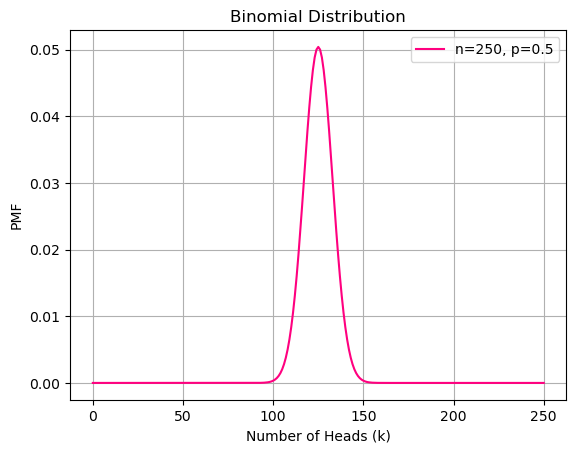

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(pmf_k, color = "#FF007F", label='n=250, p=0.5')

ax.set(xlabel='Number of Heads (k)', ylabel='PMF',
       title='Binomial Distribution')

ax.legend()

ax.grid()
plt.show()

In [11]:
pmf_k.max_prob()

125

In [12]:
pmf_k[125]

0.050412213147309655

In [13]:
pmf_k[140]

0.008357181724918204

In [14]:
# In the article, MacKay quotes, the statistician says "If the coin were unbiased, the chance 
# of getting a result as extreme as that would be less than 7%."

In [15]:
def prob_ge(pmf, threshold):
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [16]:
# probability of getting 140 heads or more
prob_ge(pmf_k, 140)

0.03321057562002163

In [17]:
pmf_k.prob_ge(140)

0.03321057562002163

In [18]:
#The resulting 3.3% is about half of the 7% because the under 110 heads were not counted.
# The other side of the curve.  This shows that extreme outcomes are unlikely if the coin is fair.

In [19]:
# the left "tail"
pmf_k.prob_le(110)

0.03321057562002164

In [20]:
# Bayesian Estimation
# Math might tell me why If I want a certain outcome, one course of action might be preferable, but math
# never judges my choices, only tells me what to expect.  I love math.
# Equally balanced coin spun on edge will land on either side 50% of the time
# Start with a uniform prior which assumes all values of x are equally likely.
# (might have to consider different priors - will revisit)


In [21]:
# Uniform prior, hypos is an array of equally spaced values between 0 and 1
hypos = np.linspace(0,1,101)
prior = Pmf(1, hypos)
print(prior)

0.00    1
0.01    1
0.02    1
0.03    1
0.04    1
       ..
0.96    1
0.97    1
0.98    1
0.99    1
1.00    1
Name: , Length: 101, dtype: int64


In [22]:
likelihood_heads = hypos
likelihood_tails = 1-hypos
print(likelihood_heads)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [23]:
# Reformatted as a dictionary
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

In [24]:
# to represent the data, string with H repeated 140 times, and T repeated 110 times
dataset = 'H' * 140 + 'T' * 110
print(dataset)

HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT


In [25]:
# This function takes a pmf that represents the priors and a sequence of strings that are the results of
# the coin spin
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]
        
    pmf.normalize()

#normalize is outside the loop.  Only normalized once, can cause floating point errors.

In [26]:
posterior = prior.copy()
update_euro(posterior, dataset)

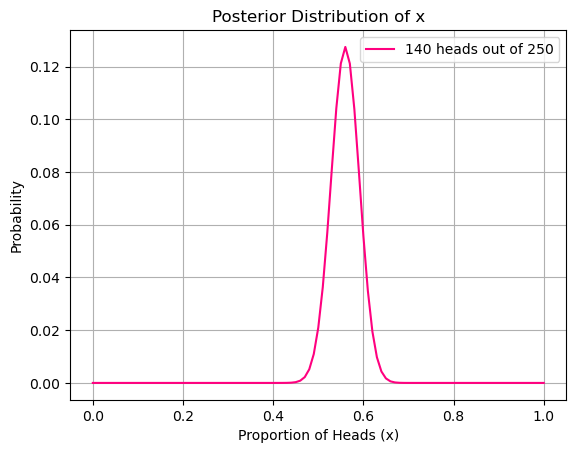

In [27]:
fig, ax = plt.subplots()
ax.plot(posterior, color = "#FF007F", label='140 heads out of 250')

ax.set(xlabel='Proportion of Heads (x)', ylabel='Probability',
       title='Posterior Distribution of x')

ax.legend()

ax.grid()
plt.show()

In [28]:
# The posterior districution represents our beliefs about x after seeing the data.  It indicates that 
# values less than 0.4 and greater than 0.7 are unlikely; values between 0.5 and 0.6 are the most likely
# The most likely value for x is 0.56, which is the proportion of heads in the dataset, 140/250.

posterior.max_prob()

0.56

In [29]:
# Triangle prior
# So let's say that the coin isn't equally weighted and we cannot use a uniform prior.
# So it would be logical to say that a prior that gives a higher probability to values of x near 0.5 and
# lower probability to extreme values
# so a triangle shaped prior

In [30]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)

In [31]:
print(ramp_up)
print(ramp_down)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27
 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]


In [32]:
a = np.append(ramp_up, ramp_down)

triangle = Pmf(a,hypos, name = 'triangle')
triangle.normalize()

2500

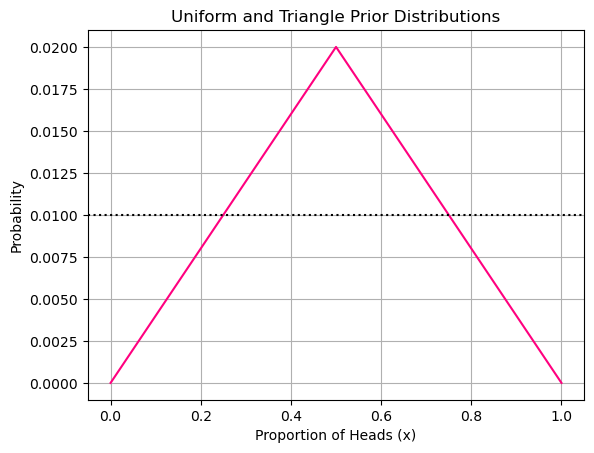

In [33]:
fig, ax = plt.subplots()
ax.plot(triangle, color = "#FF007F")
plt.axhline(y = .01, color = '#000000', linestyle = ':')

ax.set(xlabel='Proportion of Heads (x)', ylabel='Probability',
       title='Uniform and Triangle Prior Distributions')
ax.grid()
plt.show()

In [34]:
uniform = Pmf(1, hypos, name = 'uniform')
uniform.normalize()

update_euro(uniform, dataset)
update_euro(triangle, dataset)

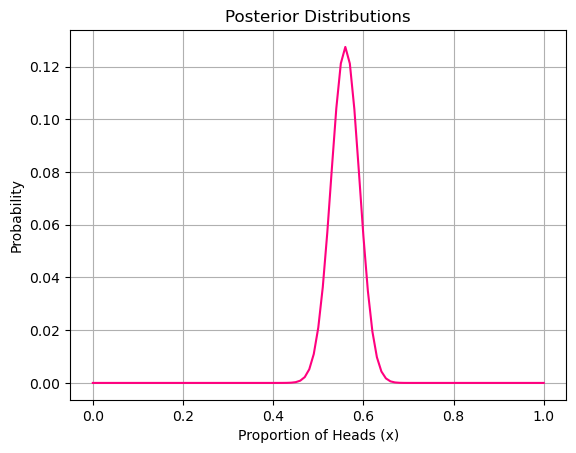

In [35]:
fig, ax = plt.subplots()
ax.plot(posterior, color = "#FF007F")

ax.set(xlabel='Proportion of Heads (x)', ylabel='Probability',
       title='Posterior Distributions')

ax.grid()
plt.show()

In [36]:
# More beatings will not improve morale
# Especially if you put me with people who hate math and can't read and do not want to learn
# I am neither a teacher, a mother, nor a psychologist. I can help capable adults, and for the older 
# adults I can clean, and perform simple chores, but I can't fix psychological issues or issues when
# they refuse doctors for religious reasons. Some homes aren't free rides while you grow, some homes
# are shut out all the light and stuff you into boxes that are too small.  

In [37]:
# The differnce between the priors are hardly noticeable.  This is an example of "swamping the priors"
# with enough data, people who start with different priors will tend to converge on the same posterior
# distribution

In [38]:
# Binomial Likelihood Function
# So far we've been computing the updates one at a times, but that is time consuming for many spins
# We can use the binomial distribution

In [39]:
# Using Scipy to compute
# function takes a Pmf that represents the prior distribution and a tuple of integers that represent 
# the data.

from scipy.stats import binom

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [40]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [41]:
# https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
np.allclose(uniform, uniform2)

True

In [42]:
# Bayesian Statistics
# The "Euro Problem" and the "101 Bowls Problem" are similar: the prior distributions are the same,
# the likelihoods are the same, and with the same data, the results would be the same.  But there are 
# two differences:

# The first is the choice of the prior. With 101 bowls, the uniform prior is implied by the statement
# of the problem which says that we chose one bowl at random with equal probability

# In the Euro problem, the choice of the prior is subjective. Because the priors are subjective, 
# the posteriors are subjective, too.

# The other difference is the nature of what we are estimating.  In the 101 bowls problem, we choose 
# the bowl randomly, so it is uncontroversial to compute the probabilities of choosing each bowl. In the Euro 
# problem, the proportion of heads is a physical property, which under some interpretations are not considered
# random.

#Consider the age of the universe.  Our current estimate is 13.8 bn years, but it might off by 0.02 bn years 
# in either direction.
# Now consider that we would like to know the probability that the age of the universe is actually 
# greater than 13.81 bn years. Under some interpretations of probability, we would not be able to answer this.  
# Under the Bayesian interpretation of probability, it is meaningful and useful to treat physical quanitities
# as if they were random and compute probabilities.

# In the Euro problem, the prior districution represents what we believe about coins in general and the posterior 
# represents what we believe after seeing the data.

# The subjectivity of the prior and the interpretation of the posterior are key differences between using 
# Baye's theorem and doing Bayesian Statistics.  Baye's Theorem is a mathematical law of probability but 
# Bayesian statistics are surprisingly controversial.  See Sharon Bertsch McGrayne's book.  "The theory that 
# would not die.

In [1]:
# Exercise 4-1
# In MLB, most players have a batting average between .200 and .330,  which means that their probability of
# getting a hit is between 0.2 an 0.33.
# Suppose a player appearing in their first game gets 3 hits out of 3 attempts (DATA).  What is the posterior
# distribution for their probability of getting a hit?
# two hypos are "hit" and "no hit"
# (does this mean given their batting average after knowing that they had extremely abnormal perfect first game)

# similar to coin problem in that only two results, hit (H) or no hit(NH)
# So can I assume a prior with a curve fitted to have the IQR fall between 0.2 and 0.33?
# Average of two is 0.265 (assumption that this would be the midpoint of a normal distribution)
# posterior would be updated with the weirdly abnormal perfect first game?

In [44]:
import numpy as np
from scipy.stats import norm

In [106]:
# https://proclusacademy.com/blog/practical/normal-distribution-python-scipy/
# modifying example from above website

# assuming normal (symmetrical distro) with the IQR bounded by 0.2 and 0.33, with a midpoint 
# (and mean due to symmetry) of 0.265 and a stddev of 0.065

from scipy import stats


mean = 0.265
standard_deviation = 0.065

# Create normal distribution using the 'norm' class
# loc - specifies the mean
# scale - specifies the standard deviation
battingavg_distribution = stats.norm(
    loc=mean, 
    scale=standard_deviation
)
# This yields a rv_frozen object, whatever the heck that is


In [107]:
min_batavg = 0.001
max_batavg = 0.601
batavg_values = np.linspace(min_batavg, max_batavg, num=100)
print(batavg_values)

[0.001      0.00706061 0.01312121 0.01918182 0.02524242 0.03130303
 0.03736364 0.04342424 0.04948485 0.05554545 0.06160606 0.06766667
 0.07372727 0.07978788 0.08584848 0.09190909 0.0979697  0.1040303
 0.11009091 0.11615152 0.12221212 0.12827273 0.13433333 0.14039394
 0.14645455 0.15251515 0.15857576 0.16463636 0.17069697 0.17675758
 0.18281818 0.18887879 0.19493939 0.201      0.20706061 0.21312121
 0.21918182 0.22524242 0.23130303 0.23736364 0.24342424 0.24948485
 0.25554545 0.26160606 0.26766667 0.27372727 0.27978788 0.28584848
 0.29190909 0.2979697  0.3040303  0.31009091 0.31615152 0.32221212
 0.32827273 0.33433333 0.34039394 0.34645455 0.35251515 0.35857576
 0.36463636 0.37069697 0.37675758 0.38281818 0.38887879 0.39493939
 0.401      0.40706061 0.41312121 0.41918182 0.42524242 0.43130303
 0.43736364 0.44342424 0.44948485 0.45554545 0.46160606 0.46766667
 0.47372727 0.47978788 0.48584848 0.49190909 0.4979697  0.5040303
 0.51009091 0.51615152 0.52221212 0.52827273 0.53433333 0.540393

In [108]:
probabilities = battingavg_distribution.pdf(x=batavg_values)
print(probabilities)
# I don't know quite how the pdf works, but this just doesn't look like the right scale. The curve is right
# and the IQR in the right place.

[1.60662775e-03 2.33611381e-03 3.36741853e-03 4.81198834e-03
 6.81673486e-03 9.57310022e-03 1.33276376e-02 1.83940819e-02
 2.51667666e-02 3.41350933e-02 4.58985679e-02 6.11817006e-02
 8.08478212e-02 1.05910609e-01 1.37541886e-01 1.77074023e-01
 2.25995141e-01 2.85935261e-01 3.58641627e-01 4.45941659e-01
 5.49692437e-01 6.71716237e-01 8.13722450e-01 9.77217234e-01
 1.16340333e+00 1.37307373e+00 1.60650389e+00 1.86334842e+00
 2.14254882e+00 2.44225919e+00 2.75979704e+00 3.09162566e+00
 3.43337334e+00 3.77989317e+00 4.12536508e+00 4.46343915e+00
 4.78741654e+00 5.09046178e+00 5.36583747e+00 5.60715051e+00
 5.80859747e+00 5.96519598e+00 6.07298935e+00 6.12921266e+00
 6.13241063e+00 6.08250022e+00 5.98077420e+00 5.82984552e+00
 5.63353576e+00 5.39671435e+00 5.12509800e+00 4.82502186e+00
 4.50319510e+00 4.16645417e+00 3.82152604e+00 3.47481273e+00
 3.13220625e+00 2.79894052e+00 2.47948424e+00 2.17747613e+00
 1.89570093e+00 1.63610288e+00 1.39983150e+00 1.18731317e+00
 9.98341612e-01 8.321802

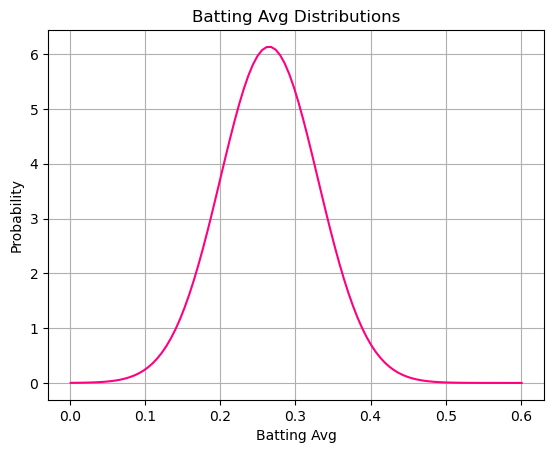

In [109]:
fig, ax = plt.subplots()
ax.plot(batavg_values, probabilities, color = "#FF007F")

ax.set(xlabel='Batting Avg', ylabel='Probability',
       title='Batting Avg Distributions')

ax.grid()
plt.show()

# But there is something weird going on here... we are getting weird y-values  

In [ ]:
# Exercise 4-2
# Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is
# is the tendency of people to adjust their answers to show themselves in the most positive light. One way to 
# improve the accruacy of the results is randomized response.
# As an example, suppose you want to know how many people cheat on their taxes.  If you can ask them directly,
# it is likely that some of the cheaters will lie.  You can get a more accurate estimate if you ask them
# indirectly, like this: Ask each person to flip a coin and without revealing the outcome,
# - If they get heads, they report yes
# - If they get tails, they honestly answer the question "Do you cheat on your taxes?"
# If someone says yes, we don't know whether they will actually cheat on their taxes - they might have only
# flipped heads.  Knowing this, people may answer more truthfully.

# Suppose you survey 100 people and get 80 yeses and 20 nos, based on this data, what is the posterior distro 
# for the fraction of people who cheat on their taxes?  
# What is the most likely quantity for the posterior distro?

# Assumption: This leads to absolute truthfulness
# 50% of time, coin will land on heads, an unknown number of those people may have cheated on their taxes
# These respondents were not asked the question 
# 50% of time, coin will land on tails, all nos are assumed to be truthful answers
                                        # all yeses are assumed to be truthful answers

# 4 hypos
#1) coin on heads, respondent cheated, prior would be 25%
#2) coin on heads, respondent didn't cheat, prior would be 25%
#3) coin on tails, respondent cheated, prior would be 
#4) coin on tails, respodent did not cheat,
    
# so the prior should look like the pmf or pdf of heads/tails of coin flip? before we know the data
# 


# binomial likelihood function
# 100 people surveyed, n = 100
# k = yes
# 